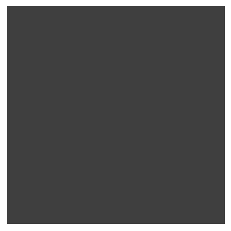

In [51]:
import cv2
import numpy as np

size = 2000
GridIMG = np.full((size, size, 3), 255, dtype=np.uint8)
maxpixel = size-1
# 外枠
cv2.line(GridIMG, (0, 0), (maxpixel, 0), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
cv2.line(GridIMG, (0, 0), (0, maxpixel), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
cv2.line(GridIMG, (0, maxpixel), (maxpixel, maxpixel), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
cv2.line(GridIMG, (maxpixel, 0), (maxpixel, maxpixel), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
# グリッド
for pixel in range(size):
    if pixel % 2 == 0:
        # 縦線
        cv2.line(GridIMG, (0, pixel), (maxpixel, pixel), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
        # 横線
        cv2.line(GridIMG, (pixel, 0), (pixel, maxpixel), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
# 保存
cv2.imwrite('TargetGrid.BMP', GridIMG)
# プロット
fig, ax = plt.subplots()
ax.imshow(GridIMG, cmap = "gray")
ax.axis("off")
plt.show()

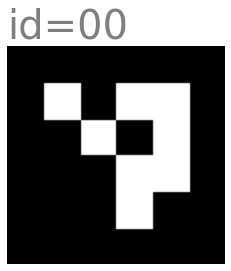

marker_id00.svg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

markerID = 0
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
marker = aruco.drawMarker(dictionary, markerID, 100) # 第２引数がID　第３引数がピクセルサイズ
fig, ax = plt.subplots()
ax.imshow(marker, cmap = "gray")
ax.axis("off")
ax.set_title('id='+str(markerID).zfill(2), loc='left', fontsize=40, alpha=0.5)
# 画像保存
savefilename = "marker_id"+str(markerID).zfill(2)
if 1:
    plt.savefig(savefilename+'.svg', bbox_inches='tight')
plt.show()
print(savefilename+'.svg')

In [2]:
camera_id = "http://192.168.0.4:8080/video"
cap = cv2.VideoCapture(camera_id)
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
while(True):
    ret, frame = cap.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(frame, dictionary) # ここで映像からマーカーを検出
    aruco.drawDetectedMarkers(frame, corners, ids, (0,255,0)) # マーカーを描画
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.4.0) ..\opencv_contrib\modules\aruco\src\aruco.cpp:986: error: (-215:Assertion failed) !_image.empty() in function 'cv::aruco::detectMarkers'
